## Primer Avance

### Importar librerías
##### Para iniciar a trabajar se hizo la importación de las librerías que se consideraron utilizar para la realización del análisis


In [2]:
import numpy as np   #Importar librería Numpy
import pandas as pd  #Importar la librería pandas
import matplotlib.pyplot as plt # Importar la librería Matplotlib
import seaborn as sns # Importar la librería Seaborn

### Lectura y revisión del DataSet


##### Se realiza la carga del Dataset en un Dataframe llamado "df_latam" para comenzar a trabajar con él.

In [2]:
df_latam = pd.read_csv('Datasets/data_latinoamerica.csv') # Carga de los datos desde su origen en un DataFrame llamado df_latam

##### Se ejecuta una visualización previa de las primeras filas para verificar el contenido del DataFrame

In [3]:
df_latam.head(10)  #Se hace la visualización de las primeras 10 filas para confirmar el contenido

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2020-01-06,AR,Argentina,9.0,0.0,41.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2020-01-07,AR,Argentina,4.0,0.0,45.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2020-01-08,AR,Argentina,3.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2020-01-09,AR,Argentina,0.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2020-01-10,AR,Argentina,1.0,0.0,49.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


##### Obtención de información acerca de los datos  y los tipos de datos que componen el dataset. Se confirma que cuenta con 12,216,057 filas y 50 columnas, además se observa que la mayoría de las columnas contienen datos tipo float (46) y el resto de las columnas contiene datos tipo objeto (4) 

In [4]:
print(df_latam.info()) # Se ejecuta el comando info para obtener mayor información sobre los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [5]:
np.shape(df_latam)  # Confirmar número de columnas y filas dentro del dataset 

(12216057, 50)

#### Exploración de valores nulos

In [6]:
print(df_latam.isnull().sum()) # Se realiza la exploración de la cantidad de valores nulos por columna

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5839054
new_deceased                              5893738
cumulative_confirmed                      5838685
cumulative_deceased                       5893376
cumulative_vaccine_doses_administered    11948128
population                                 532167
population_male                           1123794
population_female                         1123794
population_rural                         12196237
population_urban                         12196237
population_density                       12196237
human_development_index                   6705106
population_age_00_09                      1466680
population_age_10_19                      1466680
population_age_20_29                      1466680
population_age_30_39                      1466680


##### Selección de los países donde se tiene planeada la expansión y verificación de la cantidad de columnas y filas que quedaron al realizar la discriminación. Se confirma que la cantidad de datos se redujo, pero sigue siendo una cantidad considerable de información para trabajar con ella.

In [7]:
paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil'] # Se seleccionan unicamente los países de interés para el análisis
df_paises = df_latam[df_latam['country_name'].isin(paises_seleccionados)] # Se crea dataframe con los países seleccionados

In [8]:
df_paises.shape

(11970289, 50)

##### Realizamos una exploración de la información para comprobar la calidad de los datos que quedaron de la selección de los países de interés. Aplicamos una máscara como filtro para que nos muestre las columnas que tienen mas de 4 millones de datos nulos, ya que eso equivale aproximadamente a un 30% de la data original y tener vacíos o nulos por encima de esa cantidad es algo importante para considerar en el análisis.

In [9]:
df_paises.isnull().sum()[df_paises.isnull().sum()>4000000] #Se revisa cantidad de nulos presentes mayor a 4 mill por columna

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [10]:
# Al explorar la columna "location key" observamos que se repite una cantidad considerable de datos
df_paises.location_key.value_counts() 

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

##### Al analizar la calidad de los datos se puede observar que existe una gran cantidad de datos nulos en muchas columnas. Por esta razón se procede a realizar un nuevo filtro por la columna "location_key", pero solo se van a tomar en cuenta las instancias que corresponden a cada uno de los países de interés y no a sus regiones o subregiones.

In [11]:
df_paises_filtro = df_paises[df_paises['location_key'].isin(['CO', 'AR', 'CL', 'MX', 'PE', 'BR'])] # Se filtran países 

df_paises_filtro.shape # Se verifica el tamaño de la data después de filtrar por países

(5946, 50)

##### El análisis se solicita que se realice en fechas posteriores al 1 de enero de 2021, por lo que se procede a realizar un filtro para trabajar solo dentro del espacio temporal indicado.

In [12]:
df_paises_fecha = df_paises_filtro[df_paises_filtro['date']>'2021-01-01']

df_paises_fecha.shape

(3744, 50)

##### Se lleva a cabo una comparación entre países para ver la viabilidad de realizar un llenado de valores nulos, para ello primero se hace una nueva exploración de los datos nulos existentes. 

In [13]:
valores_nulos_fechas = df_paises_fecha.isnull().sum()[df_paises_fecha.isnull().sum()>0]

print(valores_nulos_fechas)
print(df_paises_fecha.shape)


new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [14]:
valores_nulos_fechas.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [15]:
df_paises_fecha.cumulative_confirmed

367         1670634.0
368         1675568.0
369         1689521.0
370         1703606.0
371         1718102.0
              ...    
10253872    4127612.0
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: cumulative_confirmed, Length: 3744, dtype: float64

In [16]:
df_paises_fecha.new_confirmed

367          7767.0
368          4934.0
369         13953.0
370         14085.0
371         14496.0
             ...   
10253872     1150.0
10253873        NaN
10253874        NaN
10253875        NaN
10253876        NaN
Name: new_confirmed, Length: 3744, dtype: float64

In [17]:
df_paises_fecha.cumulative_vaccine_doses_administered

367         20334.0
368         20529.0
369         25164.0
370         29852.0
371         34162.0
             ...   
10253872        NaN
10253873        NaN
10253874        NaN
10253875        NaN
10253876        NaN
Name: cumulative_vaccine_doses_administered, Length: 3744, dtype: float64

In [18]:
df_paises_fecha_filas = df_paises_fecha.dropna(axis=0, how='all') #Eliminar filas que tengan todos los datos nulos

df_paises_fecha_filas.shape # Se confirma que no existe ninguna fila que tenga todos los datos nulos

(3744, 50)

In [19]:
df_paises_fecha.to_csv('data_latam_filtrada.csv', index=False)

In [3]:
df_latam_filtrada = pd.read_csv('Datasets/data_latam_filtrada.csv')

In [7]:
df_latam_filtrada.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2021-01-11,AR,Argentina,13076.0,170.0,1773965.0,48108.0,67496.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


##### Para cada columna que contiene datos negativos ('new_recovered'), se aplica la función abs(), que devuelve el valor absoluto de cada elemento en la columna. Esto convierte todos los valores negativos a sus correspondientes valores positivos. Resultado: El DataFrame resultante tendrá todos los valores negativos convertidos a positivos:

In [6]:
# Convertir valores negativos de la columna new_recovered a positivos usando abs()
df_latam_filtrada['new_recovered'] = df_latam_filtrada['new_recovered'].abs()

In [8]:
columnas_promedio = ['new_confirmed', 'new_deceased', 'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'new_recovered']

In [11]:
# Iterar sobre cada país y cada columna para imputar los NaN con el promedio respectivo del país
for country, group in df_latam_filtrada .groupby('country_name'):
    for columna in columnas_promedio:
        if group[columna].notna().sum() > 0:  # Verificar si hay datos no nulos
            promedio = group[columna].mean()
        else:
            promedio = 0  # O cualquier valor que consideres apropiado
        df_latam_filtrada.loc[group.index, columna] = df_latam_filtrada .loc[group.index, columna].fillna(promedio)

##### Exploramos algunas de las columnas para confirmar que los valores se rellenaron con los promedios

In [22]:
# Se verifican los valores nulos para confirmar que se rellenaron en las columnas seleccionadas 
valores_nulos_fechas = df_latam_filtrada.isnull().sum()[df_latam_filtrada .isnull().sum()>0] 

print(valores_nulos_fechas)
print(df_latam_filtrada .shape)

Series([], dtype: int64)
(3744, 50)


In [19]:
# Suponiendo que 'nuevos_casos' está completamente lleno y 'casos_acumulados' tiene valores nulos
df_latam_filtrada.loc[:, 'cumulative_confirmed'] = df_latam_filtrada.groupby('country_name')['new_confirmed'].cumsum()

df_latam_filtrada.loc[:, 'cumulative_deceased'] = df_latam_filtrada.groupby('country_name')['new_deceased'].cumsum()


##### Exploramos algunas de las columnas para confirmar que los valores se rellenaron con las sumas de las columnas correspondientes

In [86]:
valores_nulos_fechas = df_paises_fecha.isnull().sum()[df_paises_fecha.isnull().sum()>0]

print(valores_nulos_fechas)
print(df_paises_fecha.shape)

Series([], dtype: int64)
(3744, 50)


In [21]:
columnas_acumuladas = ['cumulative_vaccine_doses_administered', 'cumulative_recovered']

# Iterar sobre cada país y cada columna para imputar los NaN con ffill y bfill
for country, group in df_latam_filtrada.groupby('country_name'):
    for columna in columnas_acumuladas:
        if group[columna].notna().sum() > 0:  # Verificar si hay datos no nulos
            df_latam_filtrada.loc[:,columna] = df_latam_filtrada.groupby('country_name')[columna].ffill().bfill()
        else:
            df_latam_filtrada.loc[group.index, columna] = df_latam_filtrada.loc[group.index, columna].fillna(0)

##### Exploramos algunas de las columnas para confirmar que los valores se rellenaron con valores anteriores o siguientes

In [26]:
valores_nulos_filtrado = df_latam_filtrada.isnull().sum()[df_latam_filtrada.isnull().sum()>0]

print(valores_nulos_fechas)
print(df_latam_filtrada.shape)

Series([], dtype: int64)
(3744, 50)


In [ ]:
df_latam_filtrada.to_csv('data_latam_imputada.csv', index=False)

In [3]:
df_latam_imputada = pd.read_csv('Datasets/data_latam_imputada.csv')

In [4]:
print(df_latam_imputada.head())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0                7767.0                166.0   
1         157.0               12701.0                323.0   
2         157.0               26654.0                480.0   
3         160.0               40739.0                640.0   
4         131.0               55235.0                771.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                

In [6]:
df_latam_imputada.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3744.000000,3744.000000,3.744000e+03,3744.000000,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,...,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3.744000e+03
mean,13921.908931,276.887411,4.695549e+06,123370.342778,8.082806e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667,9034.449675,4.511028e+06
std,24219.361378,507.240028,5.853567e+06,126385.245991,9.354873e+07,6.713776e+07,3.318494e+07,3.448407e+07,1.008074e+07,5.829529e+07,...,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972,22938.218383,8.296306e+06
min,-573.000000,0.000000,1.695000e+03,64.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000,0.000000,0.000000e+00
25%,1536.750000,26.000000,1.090949e+06,41152.250000,1.618311e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,...,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000,0.000000,0.000000e+00
50%,5214.000000,100.500000,2.880439e+06,90051.000000,4.778491e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,0.000000,7.356870e+05
75%,14834.000000,312.000000,4.535914e+06,121861.250000,9.443991e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,...,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000,9893.000000,4.861089e+06
max,298408.000000,11447.000000,2.695465e+07,491366.893891,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,2.184651e+07,8.241430e+06,134981.000000,80.042000,188.528000,95.815000,63.900000,16.600000,282957.000000,3.370623e+07


##### Aplicamos un bucle while para realizar el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default.

In [6]:
# Mostramos las columnas del dataset 
df_latam_imputada.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

##### Aplicamos bucles para calcular estadísticas descriptivas y otras métricas importantes que ofrece pandas por default con la función describe.

In [8]:
# Creación de un bucle while para cálculo de estadísticas descriptivas

i=0

while i<len(df_latam_imputada.columns):
    print(df_latam_imputada.columns[i])
    print(df_latam_imputada[df_latam_imputada.columns[i]].describe())
    print('------------------------------------')
    i+=1


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50

In [9]:
# Crear una función que solo para mostrar los valores numéricos y no los categóricos
def estadistica_descriptiva(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:', data[i].median())
            print('Varianza:', data[i].var())
            print('Rango:', data[i].max()-data[i].min())
            print('Moda:', data[i].mode())
            print('-----------------------------------')

estadistica_descriptiva(df_latam_imputada)

new_confirmed
Mediana: 5214.0
Varianza: 586577465.58212
Rango: 298981.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
-----------------------------------
cumulative_confirmed
Mediana: 2880439.0
Varianza: 34264251605569.27
Rango: 26952953.10289389
Moda: 0     4381925.0
1     4383596.0
2     4387391.0
3     4391735.0
4     4397385.0
5     4406127.0
6     4419937.0
7     4439634.0
8     4463461.0
9     4487128.0
10    4511777.0
11    4535914.0
12    4554078.0
13    4567278.0
14    4574672.0
15    4581410.0
16    4587875.0
17    4591089.0
18    7620749.0
19    7648788.0
20    7674468.0
21    7701622.0
22    7733467.0
23    7773123.0
24    7814858.0
25    7867603.0
26    7909830.0
27    7941028.0
28    7965687.0
29    7985521.0
30    7997157.0
Name: cumulative_confirmed, dtype: float64
-----------------------------------
cumulative

## Segundo Avance

##### Importar librerías

In [1]:
import numpy as np   #Importar librería Numpy
import pandas as pd  #Importar la librería pandas
import matplotlib.pyplot as plt # Importar la librería Matplotlib
import seaborn as sns # Importar la librería Seaborn

##### Cargamos el dataset obtenido de la limpieza y transformación del primer avance

In [2]:
# Cargar el dataset listo para trabajar el análisis
df_latam_imputada = pd.read_csv('Datasets/data_latam_imputada.csv')

##### Establecemos como índice la columna "date" para poder realizar un análisis temporal de los datos 

In [3]:
# Covertir la columna de fechas a tipo datetime
df_latam_imputada['date'] = pd.to_datetime(df_latam_imputada['date'])
df_latam_imputada.set_index('date', inplace=True)

##### Crear una matriz de correlación con una máscara para solo mostrar una parte del gráfico y filtrar por los valores mayores a 0.5.

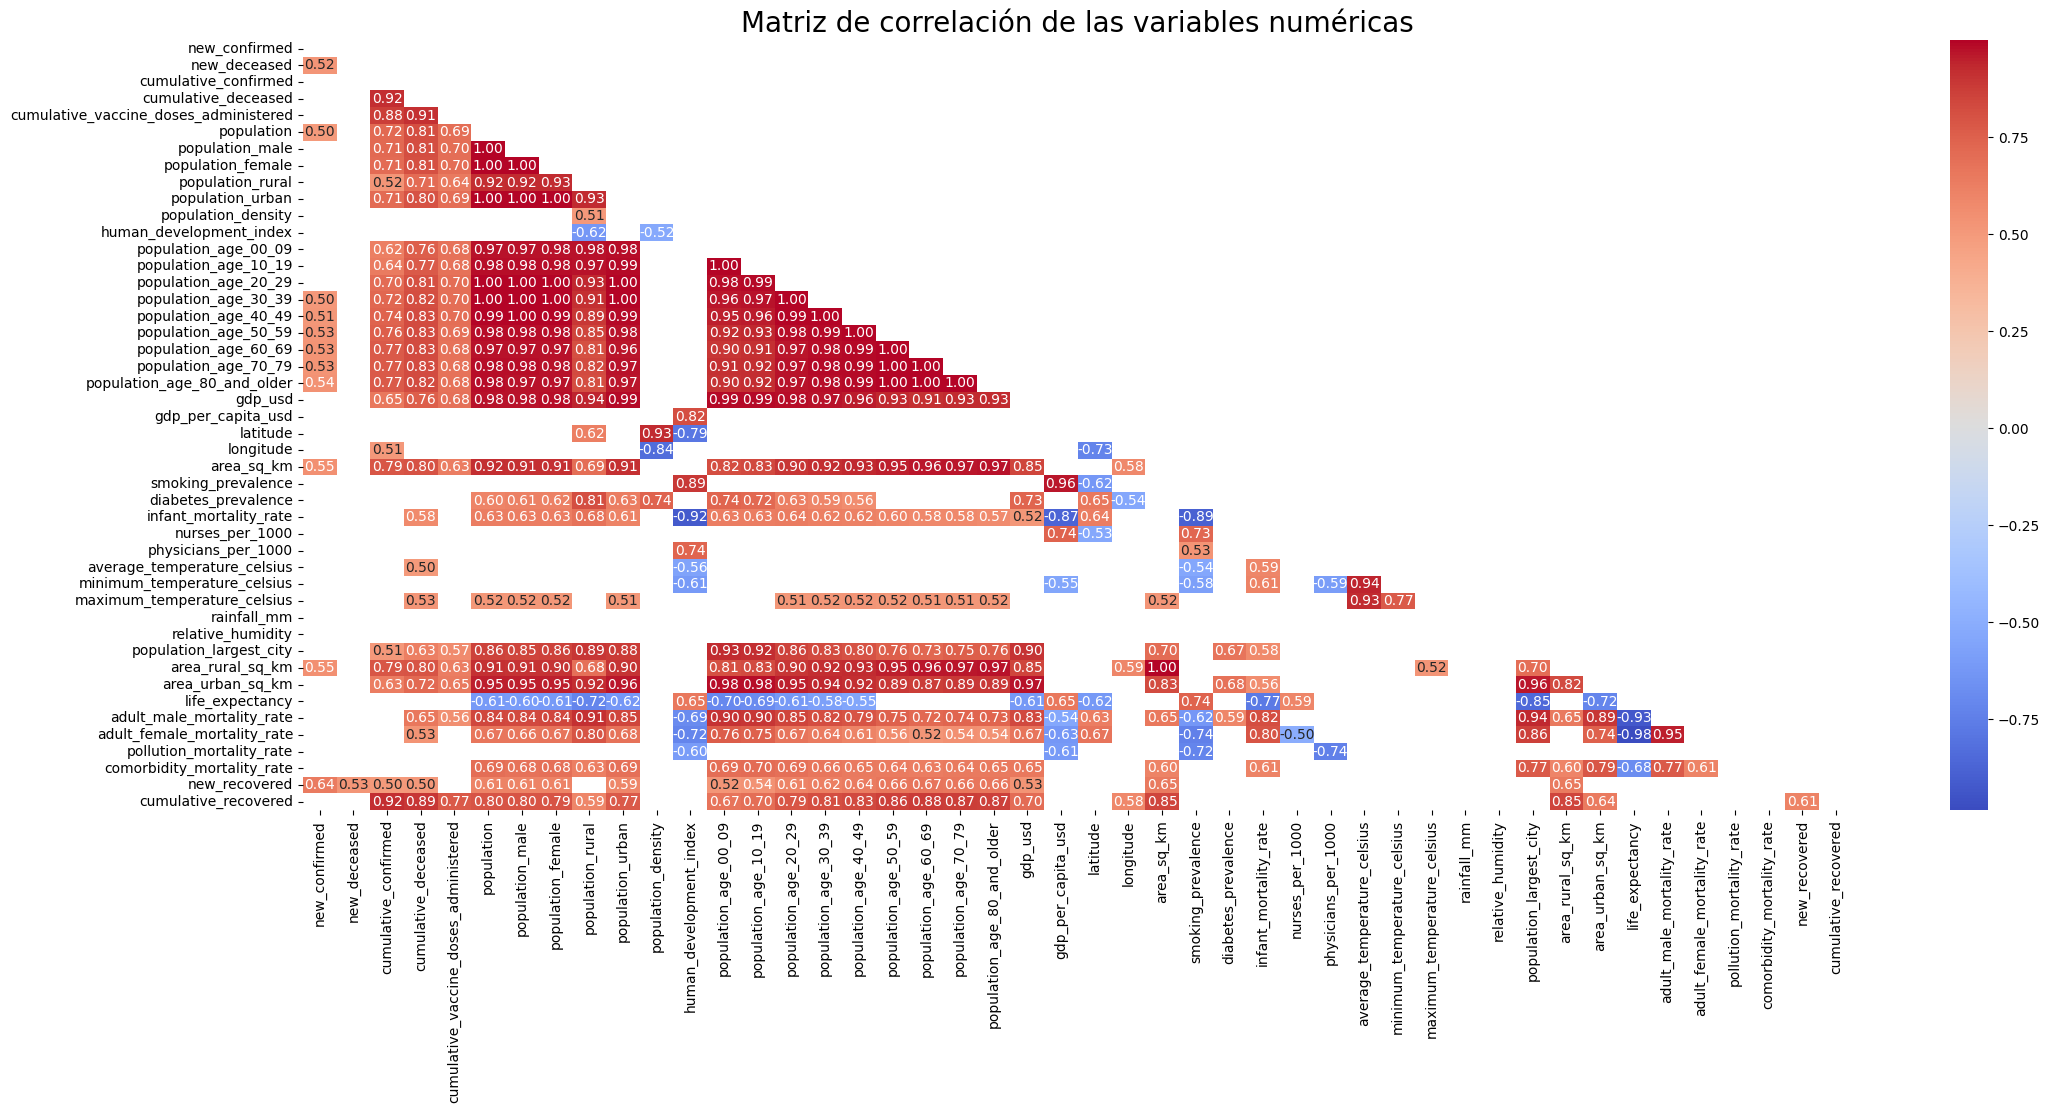

In [4]:
# Crear una matriz de correlación de las variables numéricas 
columnas_numericas = df_latam_imputada.select_dtypes(include=['float64','int64']).columns
matriz_correlacion = df_latam_imputada[columnas_numericas].corr()

# Crear una máscara para mostrar solo el triángulo superior de la matrz de correlación
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Mostrar valores superiores a 0.5 ya que existe una correlación fuerte
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion)>abs(0.5)]

# Graficar la matriz de correlación
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

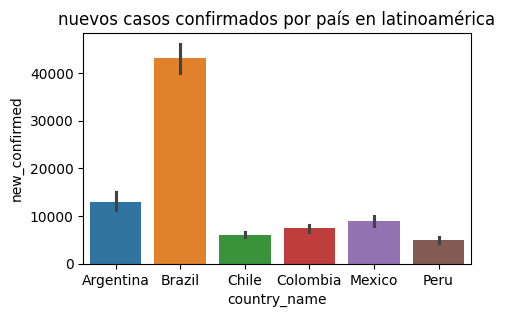

In [5]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(x='country_name', y='new_confirmed', data=df_latam_imputada, ax=ax, hue='country_name')
plt.title('nuevos casos confirmados por país en latinoamérica')
plt.show()

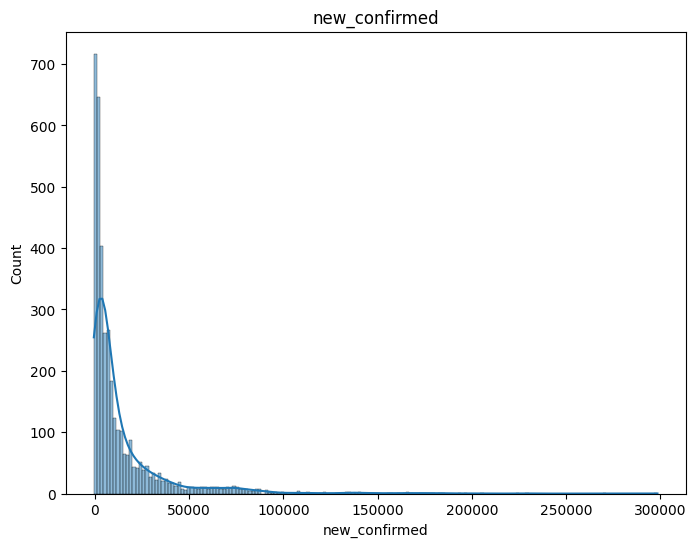

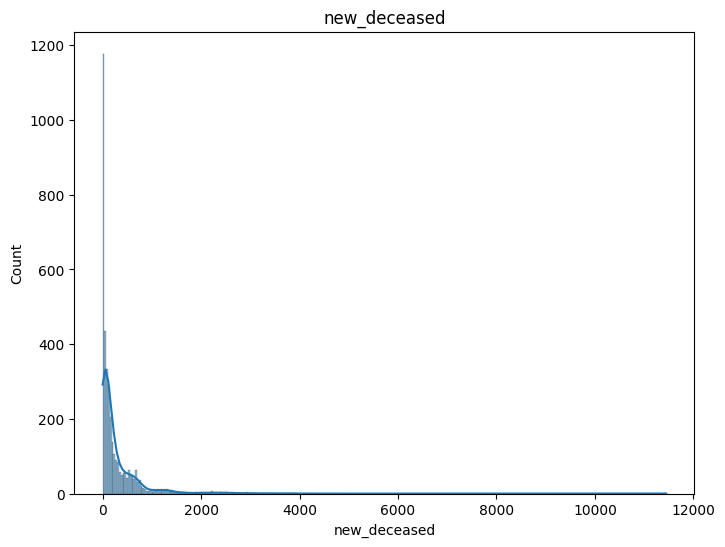

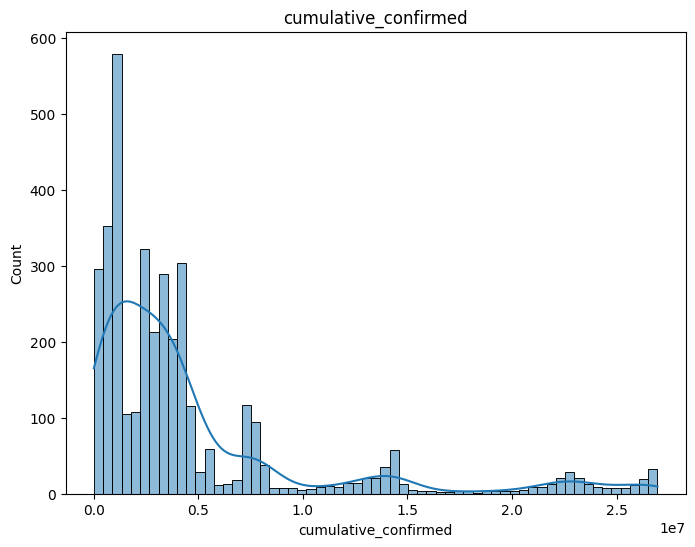

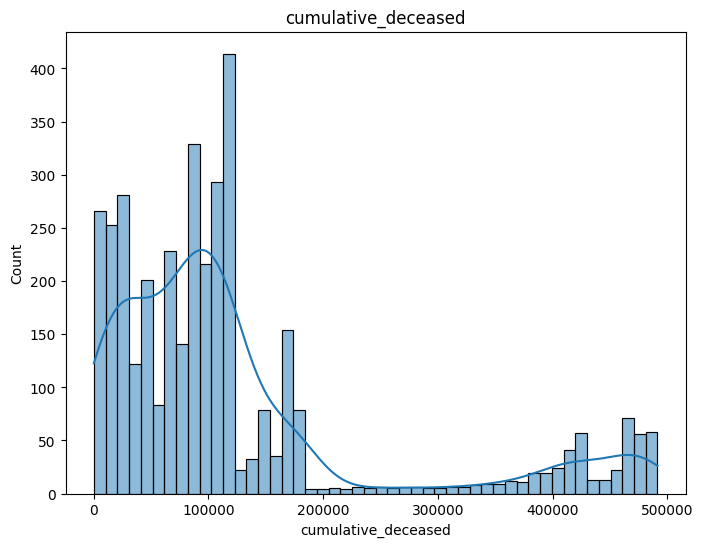

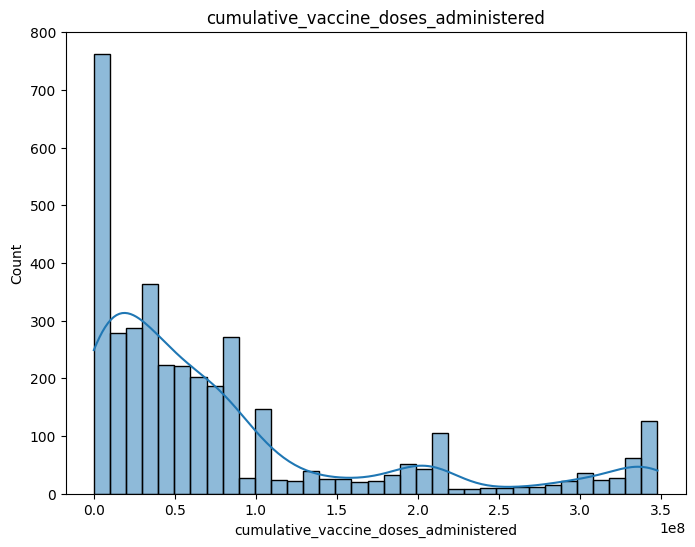

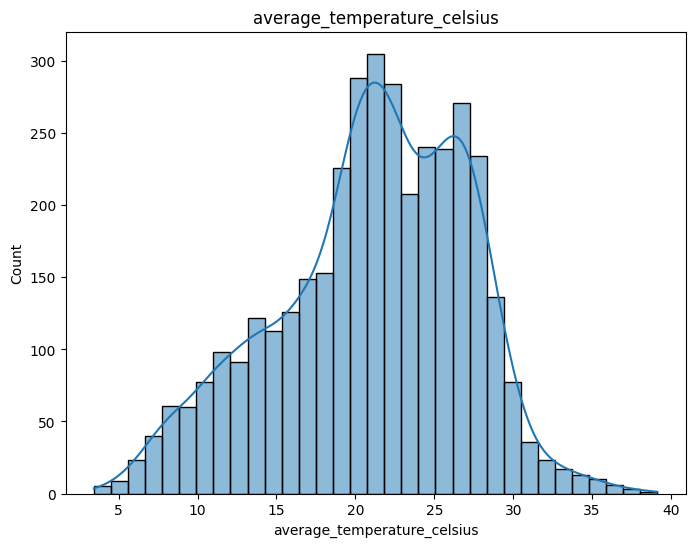

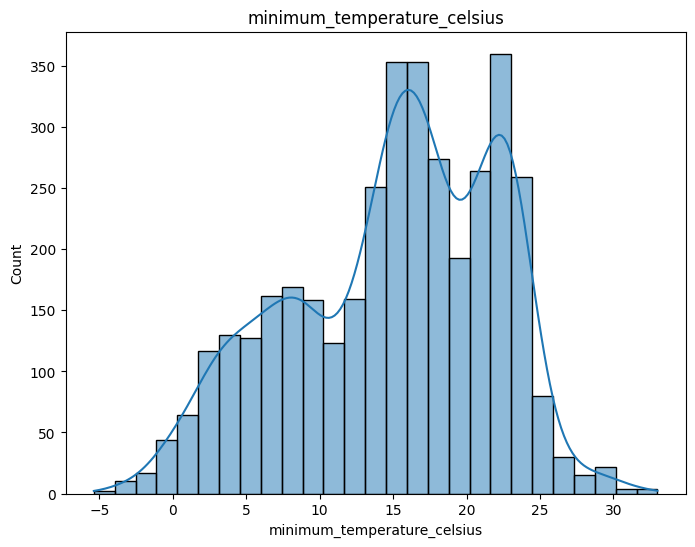

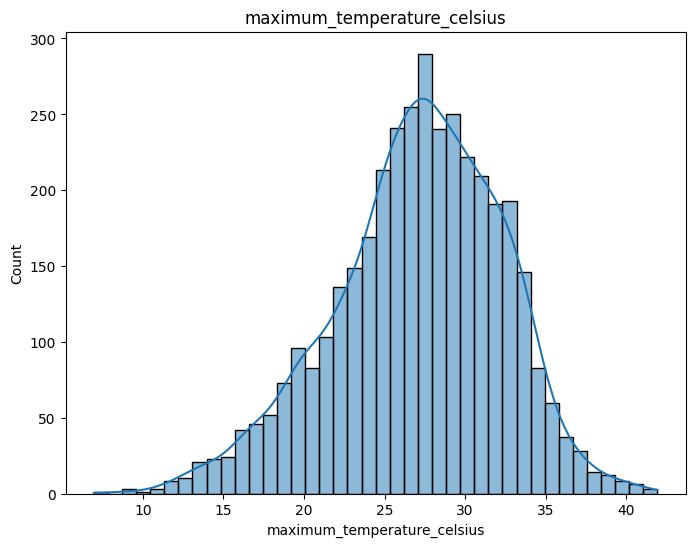

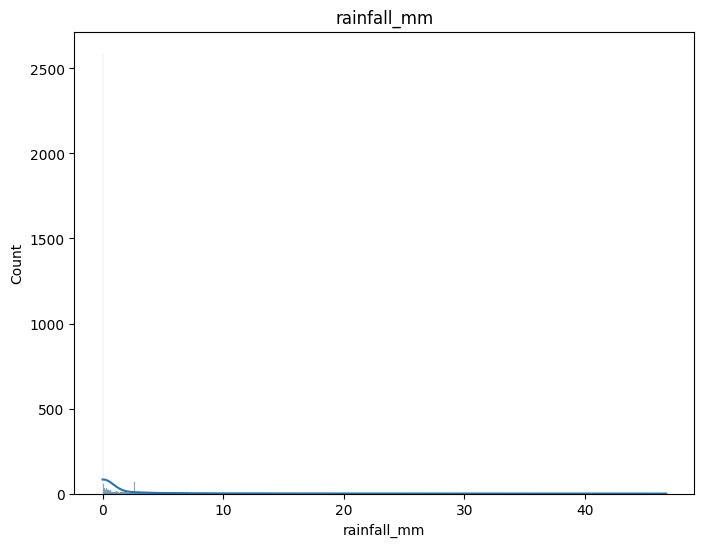

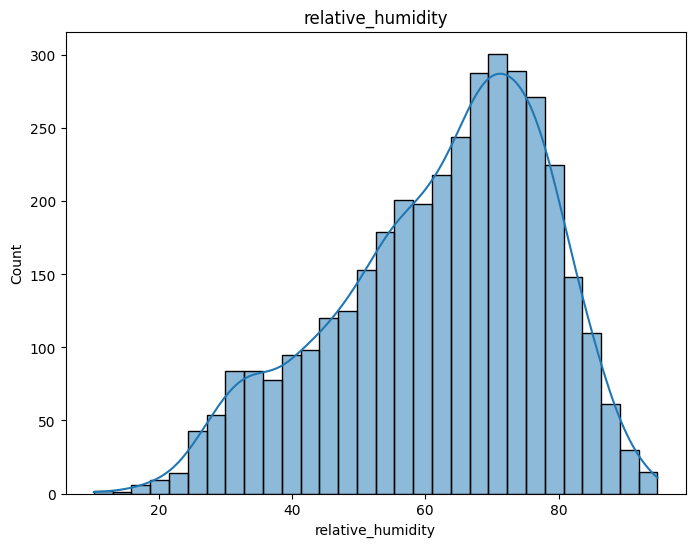

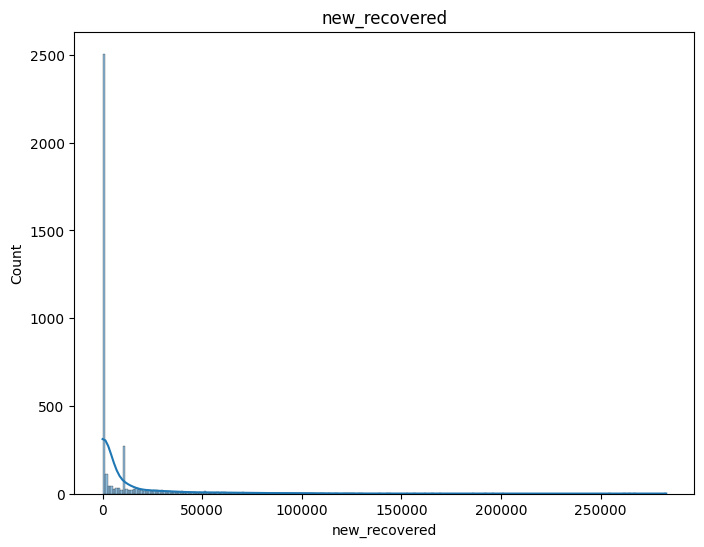

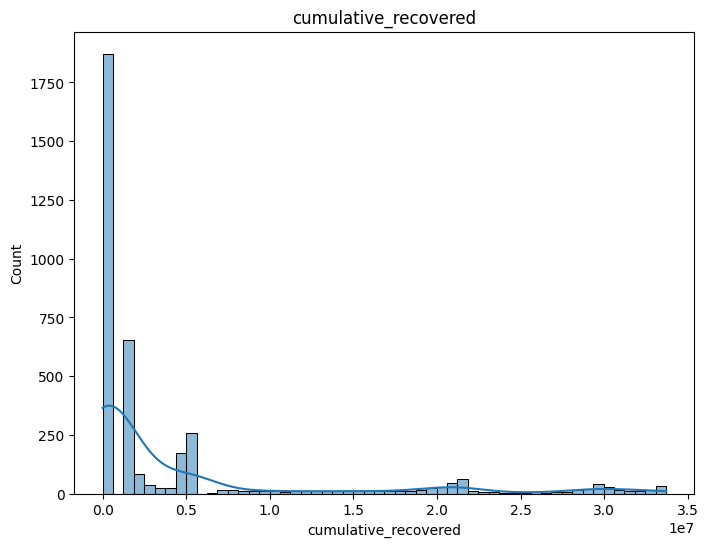

In [6]:
lista_columnas_numericas=['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'new_recovered', 'cumulative_recovered']
# Crear histogramas de las variables numéricas
for i in df_latam_imputada[lista_columnas_numericas]:
    if i in lista_columnas_numericas:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(df_latam_imputada[i], kde=True)
        plt.title(i)
        plt.show()

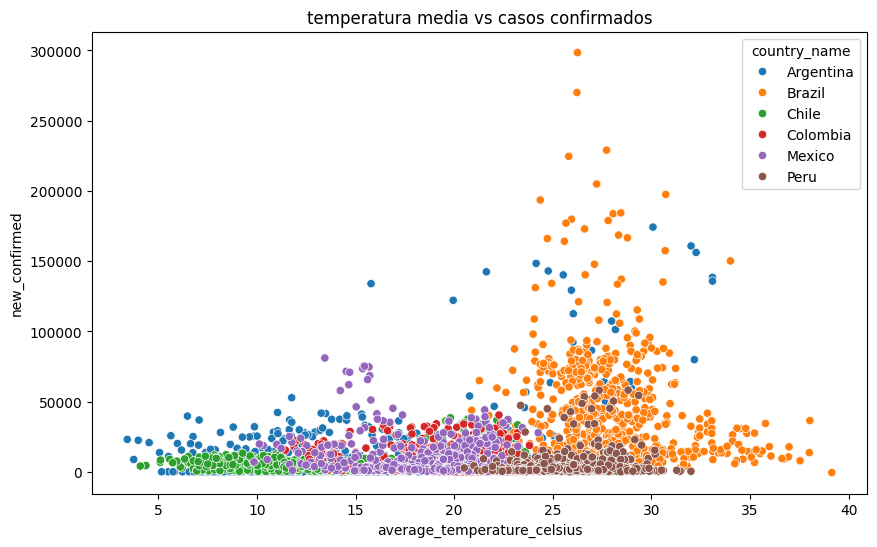

In [7]:
# Diagrama de dispersión de la temperatura media contra los casos confirmados
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df_latam_imputada, hue='country_name')
plt.title('temperatura media vs casos confirmados')
plt.show()

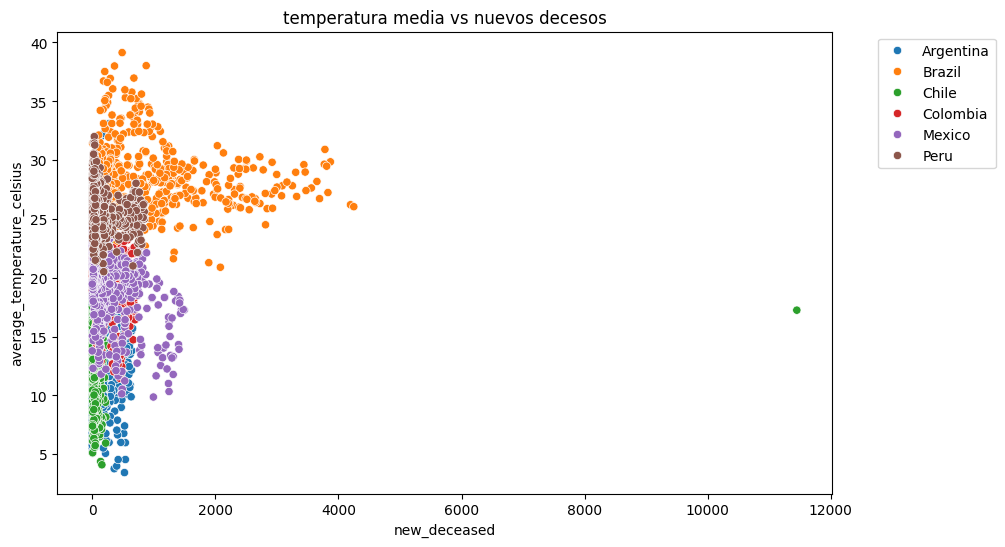

In [18]:
# Diagrama de dispersión de la temperatura media contra los nuevos decesos
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=df_latam_imputada, hue='country_name')
plt.title('temperatura media vs nuevos decesos')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Dosis de vacunas administradas acumuladas por mes de todos los países')

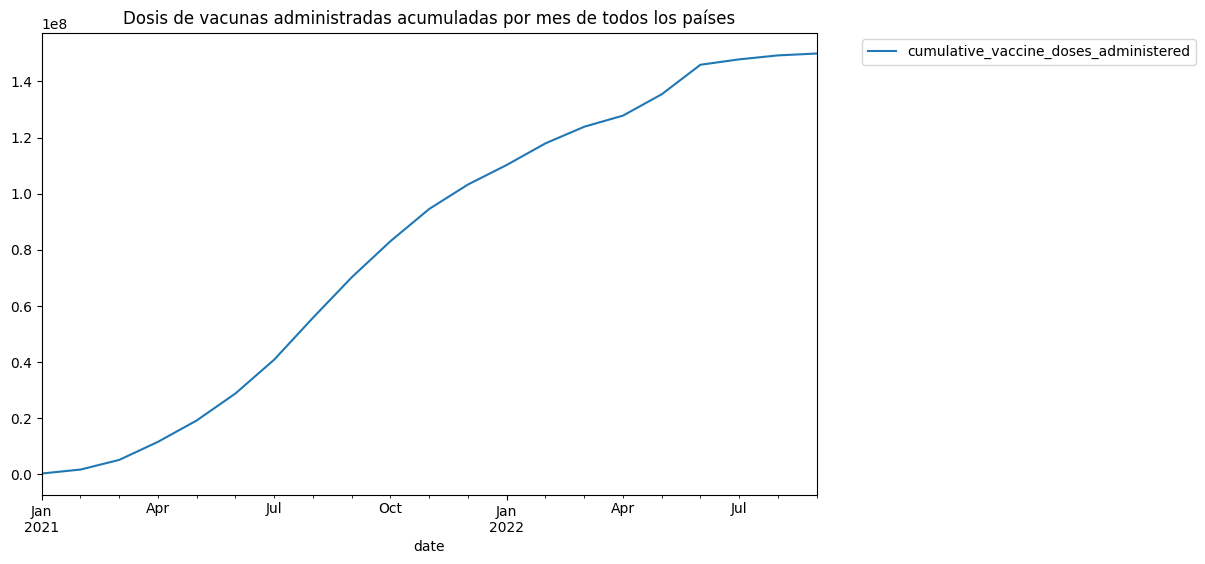

In [8]:
# Gráfica del comportamiento de las dosis administradas de todos los países (Valor medio)
fig, ax = plt.subplots(figsize=(10,6))
df_latam_imputada.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dosis de vacunas administradas acumuladas por mes de todos los países')

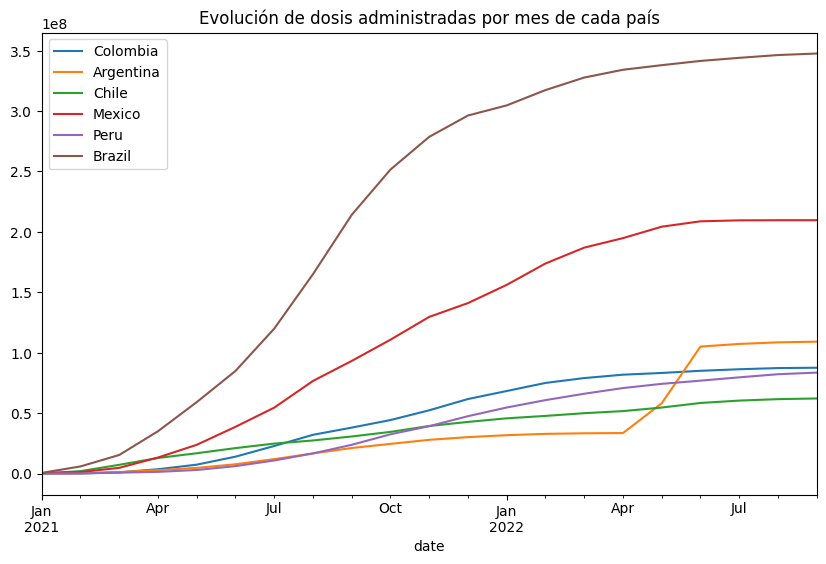

In [9]:
paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df_latam_imputada[df_latam_imputada['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

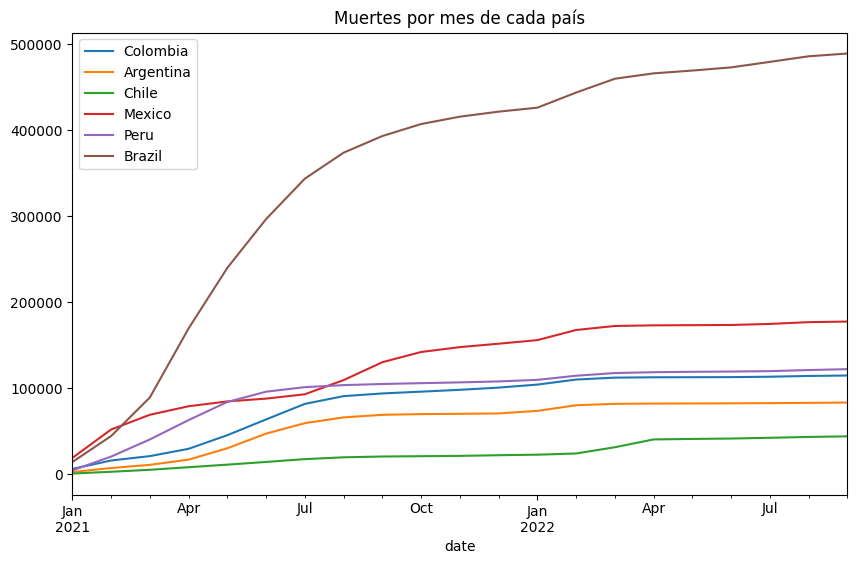

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df_latam_imputada[df_latam_imputada['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

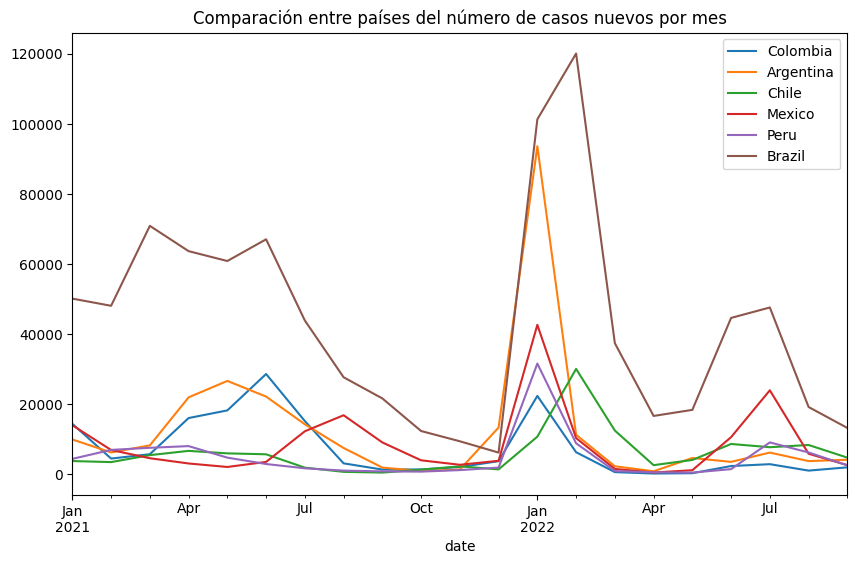

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df_latam_imputada[df_latam_imputada['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación entre países del número de casos nuevos por mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

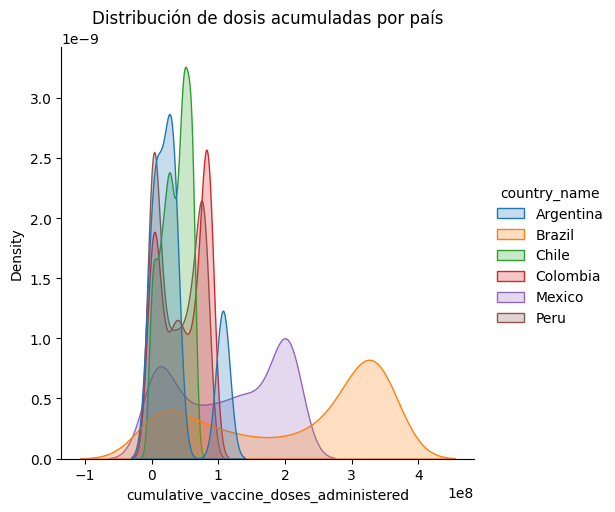

In [12]:
sns.displot(df_latam_imputada, x='cumulative_vaccine_doses_administered', hue='country_name', kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

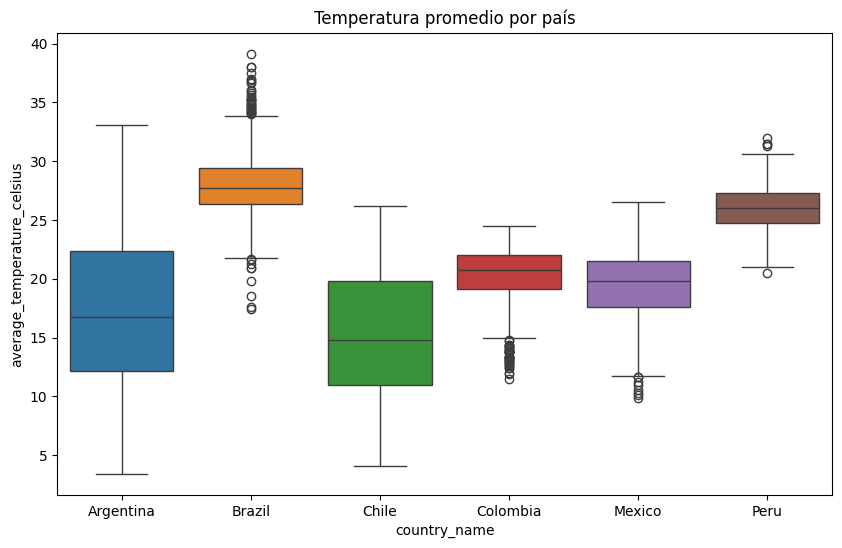

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=df_latam_imputada, hue='country_name')
plt.title('Temperatura promedio por país')
plt.show()


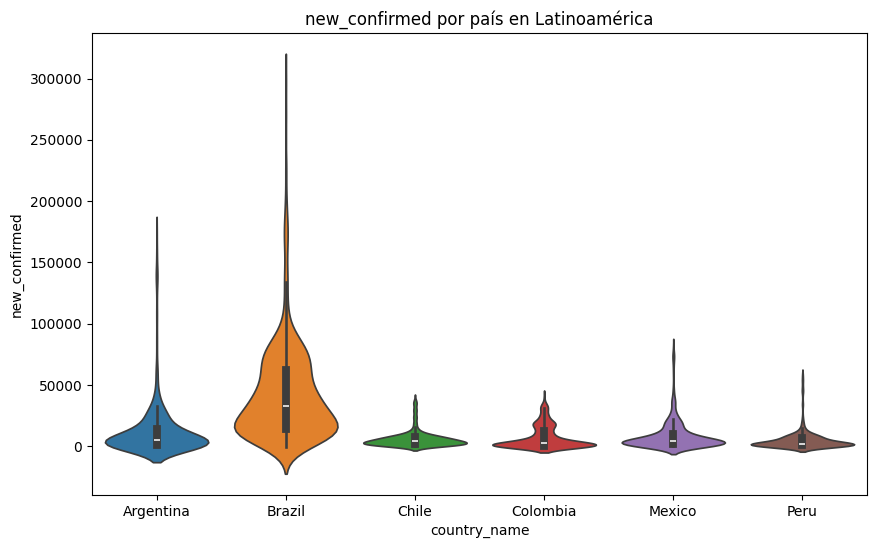

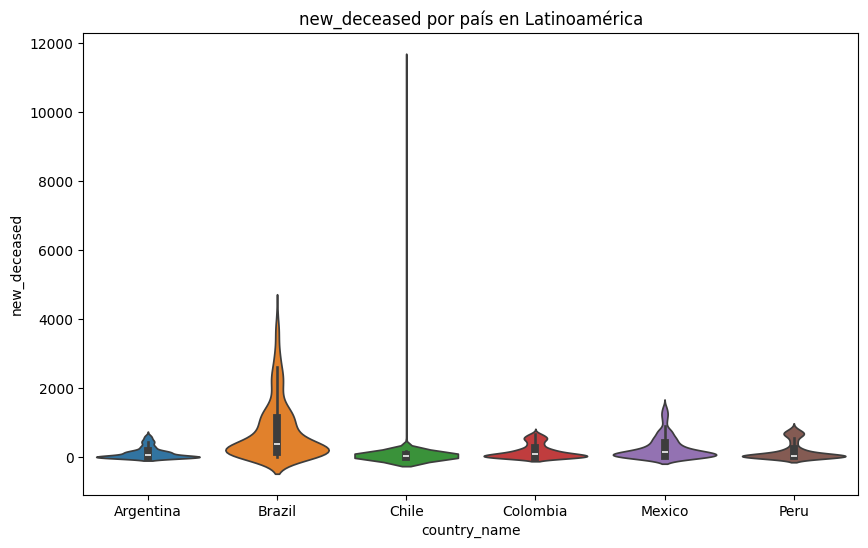

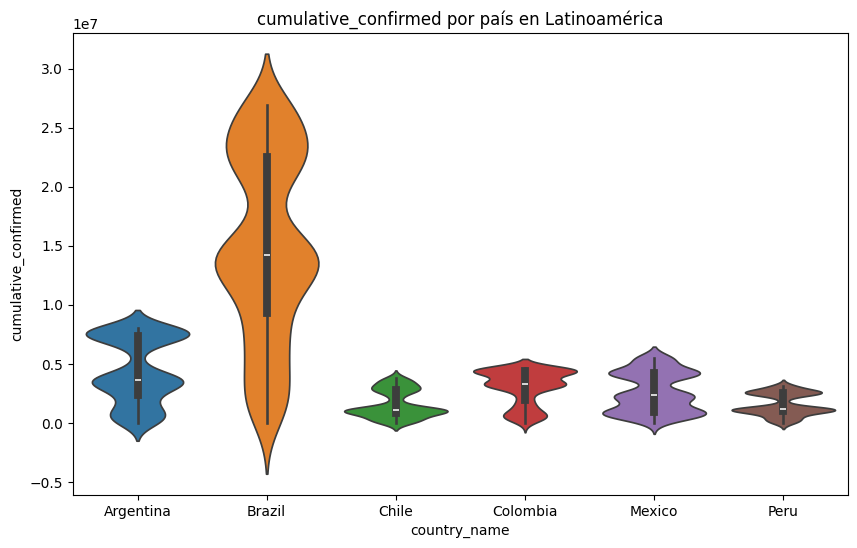

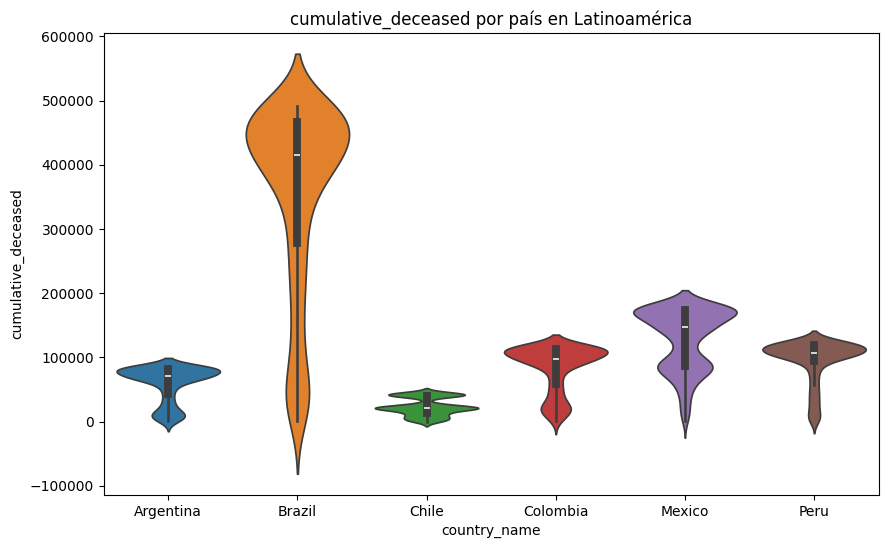

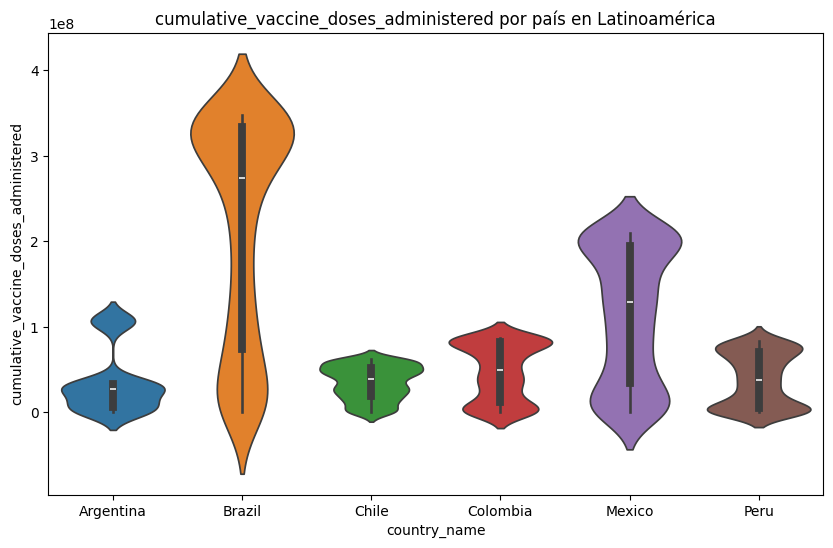

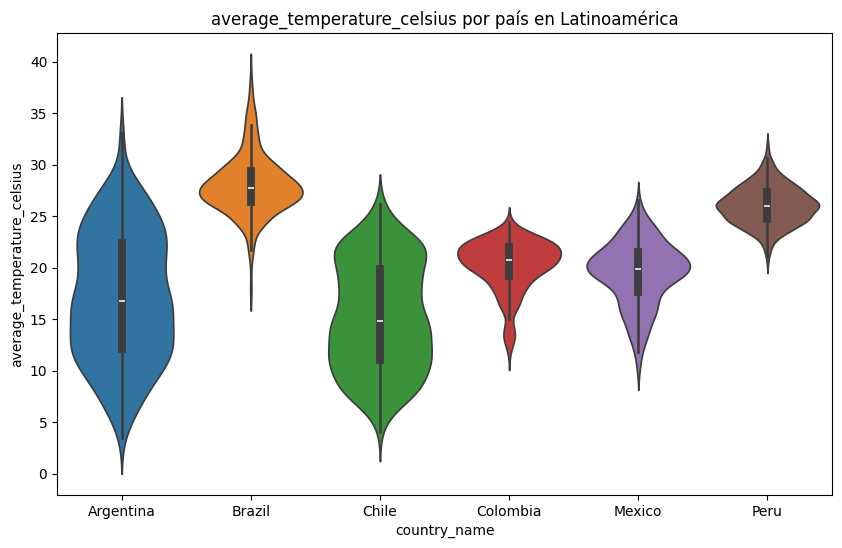

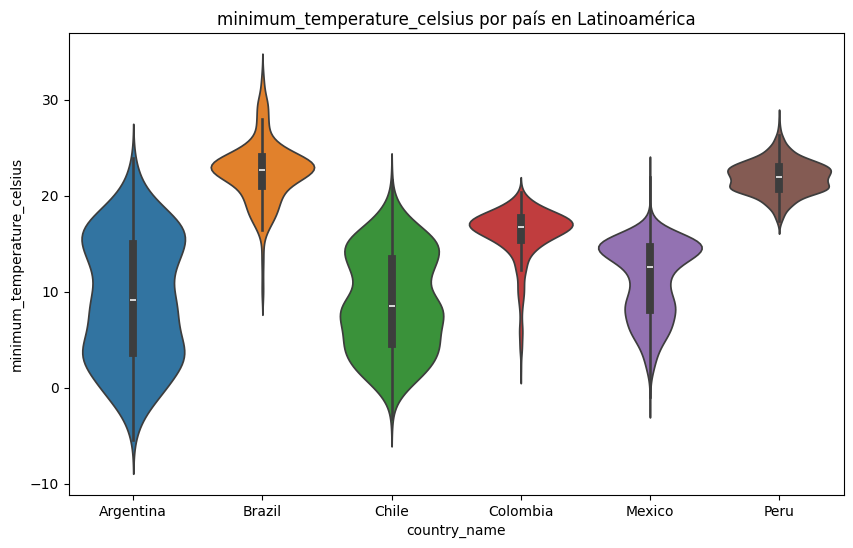

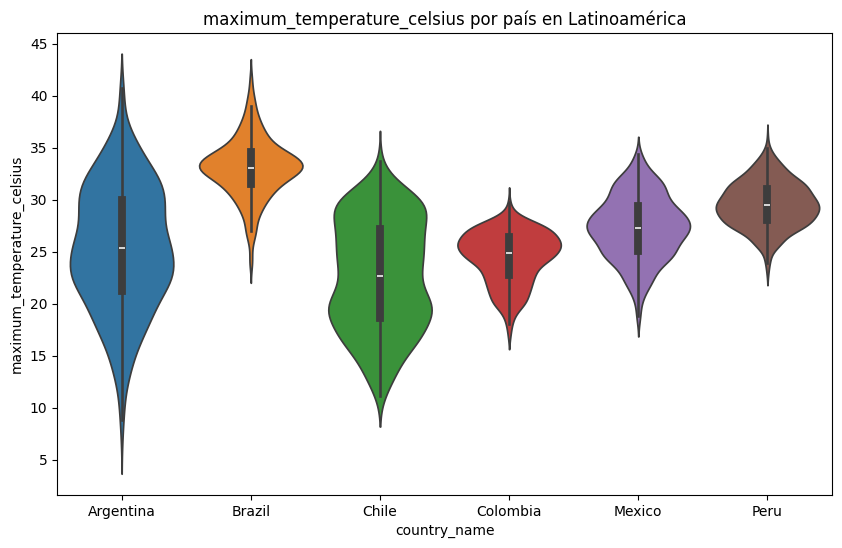

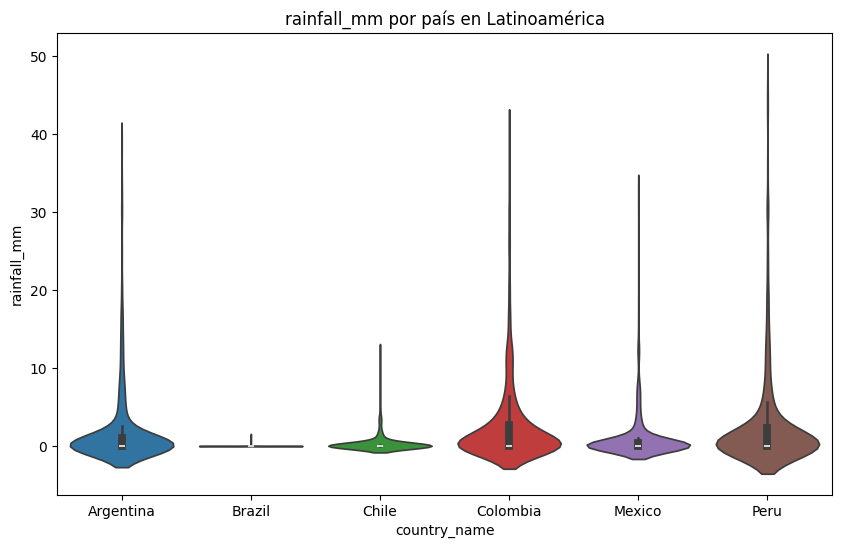

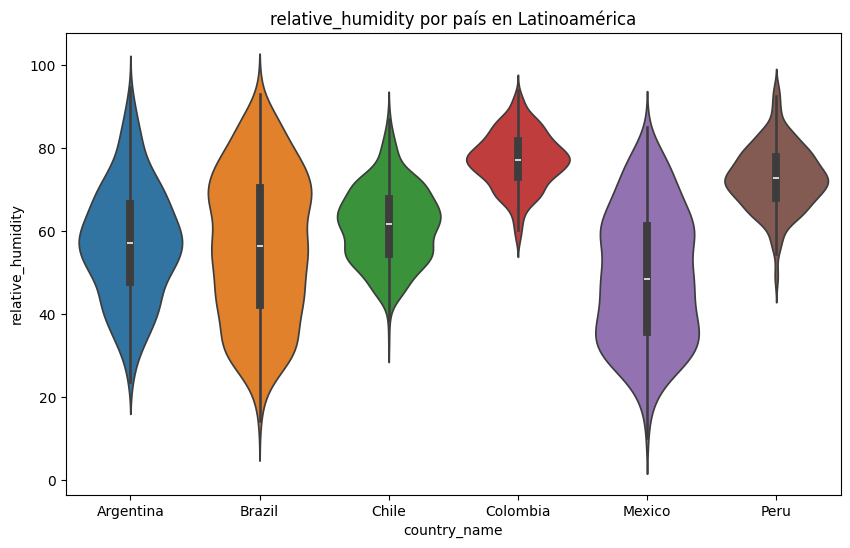

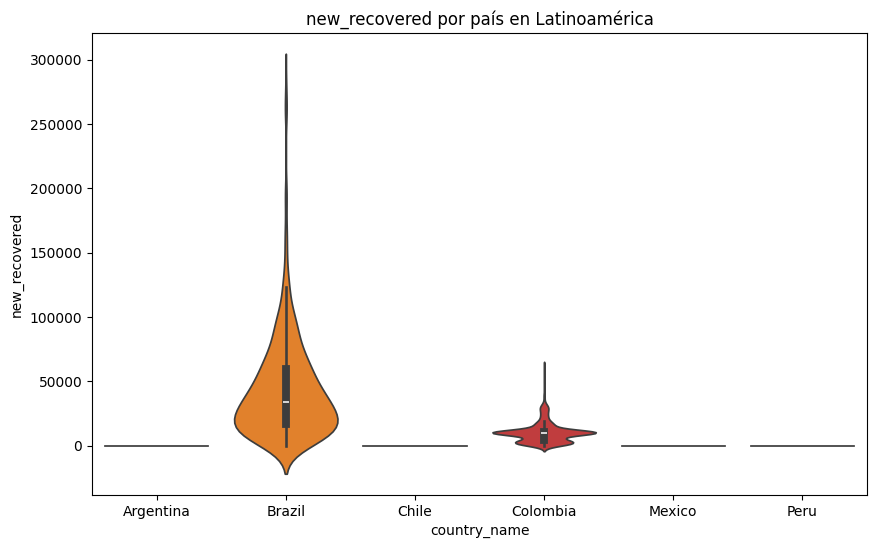

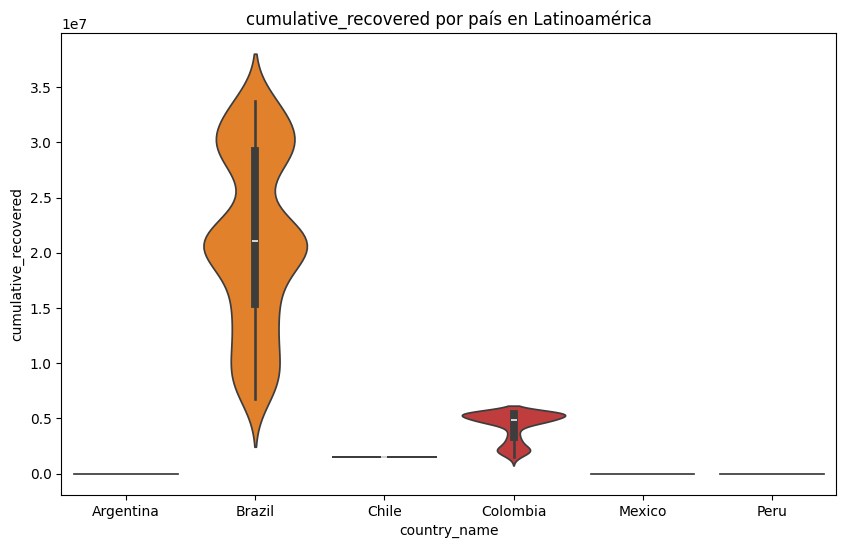

In [14]:
columnas_mayores_6 = []
for i in df_latam_imputada:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if df_latam_imputada[i].nunique()>6:
            columnas_mayores_6.append(i)

# Agregar a columnas_mayores_6 la columna country_name para poder hacer análisis por país
columnas_mayores_6.append('country_name')

# Crear un dataframe con las columnas mayores a 6
df_latam_mayores_6 = df_latam_imputada[columnas_mayores_6]

# Gráficos de Violinplot en todos los países con variables numéricas
for i in df_latam_mayores_6.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=df_latam_mayores_6, hue='country_name')
        plt.title(f'{i} por país en Latinoamérica')
        plt.show()








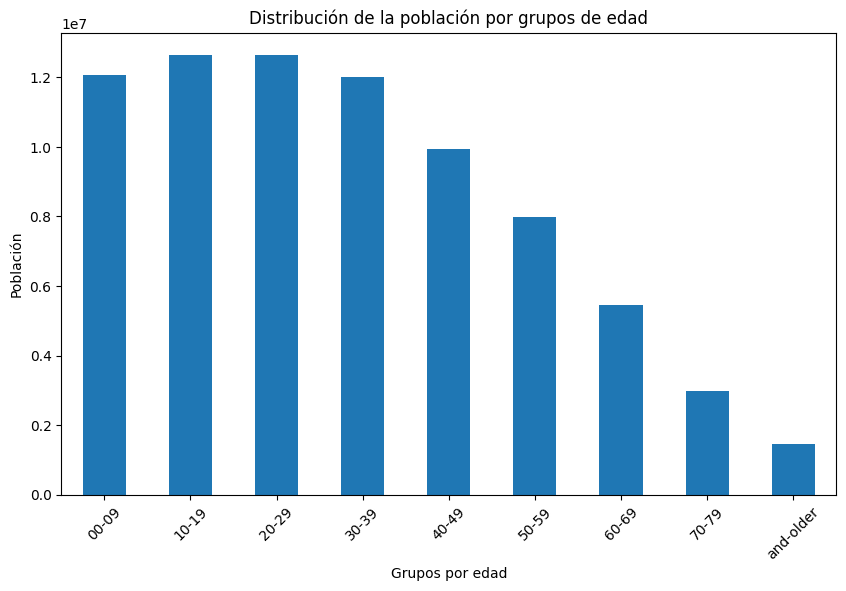

In [15]:
# Graficer la distribución de la población por grupos de edad
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']

distribucion_edad = df_latam_imputada[columnas_edad].mean()

plt.figure(figsize=(10,6))
distribucion_edad.plot(kind='bar', stacked=True)
plt.xlabel('Grupos por edad')
plt.ylabel('Población')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(distribucion_edad)), [col.split('_')[-2]+'-'+col.split('_')[-1] for col in columnas_edad], rotation=45)

plt.show()

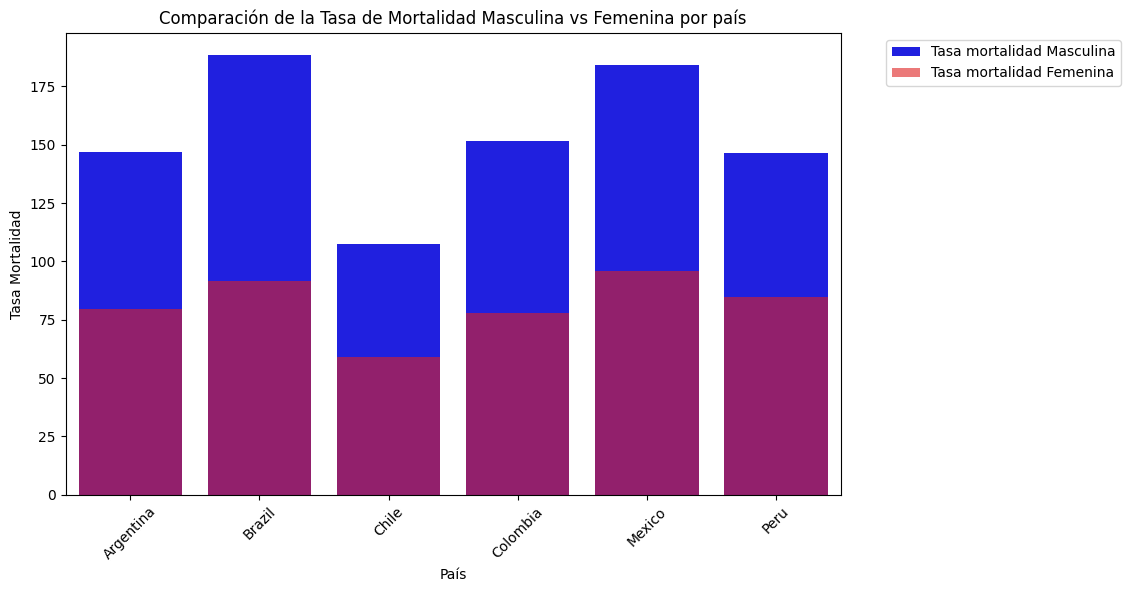

In [20]:
# Graficar mortalidad por género

plt.figure(figsize=(10,6))
sns.barplot(data=df_latam_imputada, x='country_name', y='adult_male_mortality_rate', color='blue', label='Tasa mortalidad Masculina')
sns.barplot(data=df_latam_imputada, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Tasa mortalidad Femenina')
plt.xticks(rotation=45)
plt.ylabel('Tasa Mortalidad')
plt.xlabel('País')
plt.title('Comparación de la Tasa de Mortalidad Masculina vs Femenina por país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

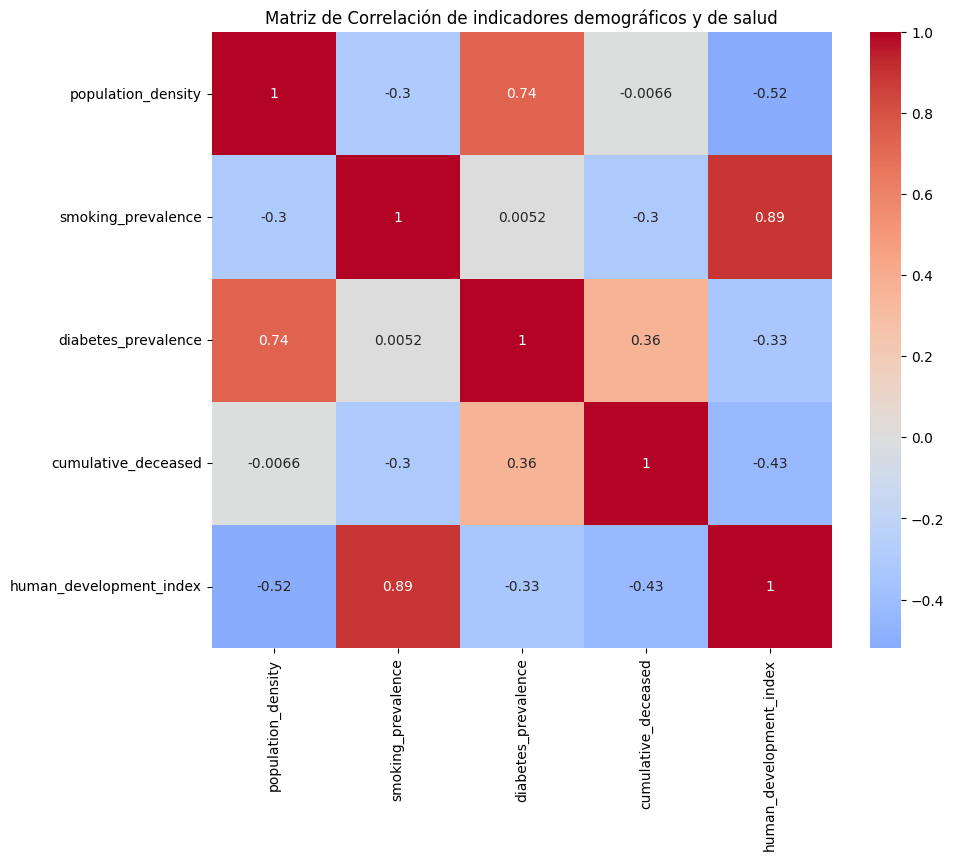

In [21]:
# Graficar Matriz de correlación de indicadores demográficos y de salud
columnas_demografia_salud = ['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
matriz_correlacion_demografica = df_latam_imputada[columnas_demografia_salud].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion_demografica, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de indicadores demográficos y de salud')
plt.show()


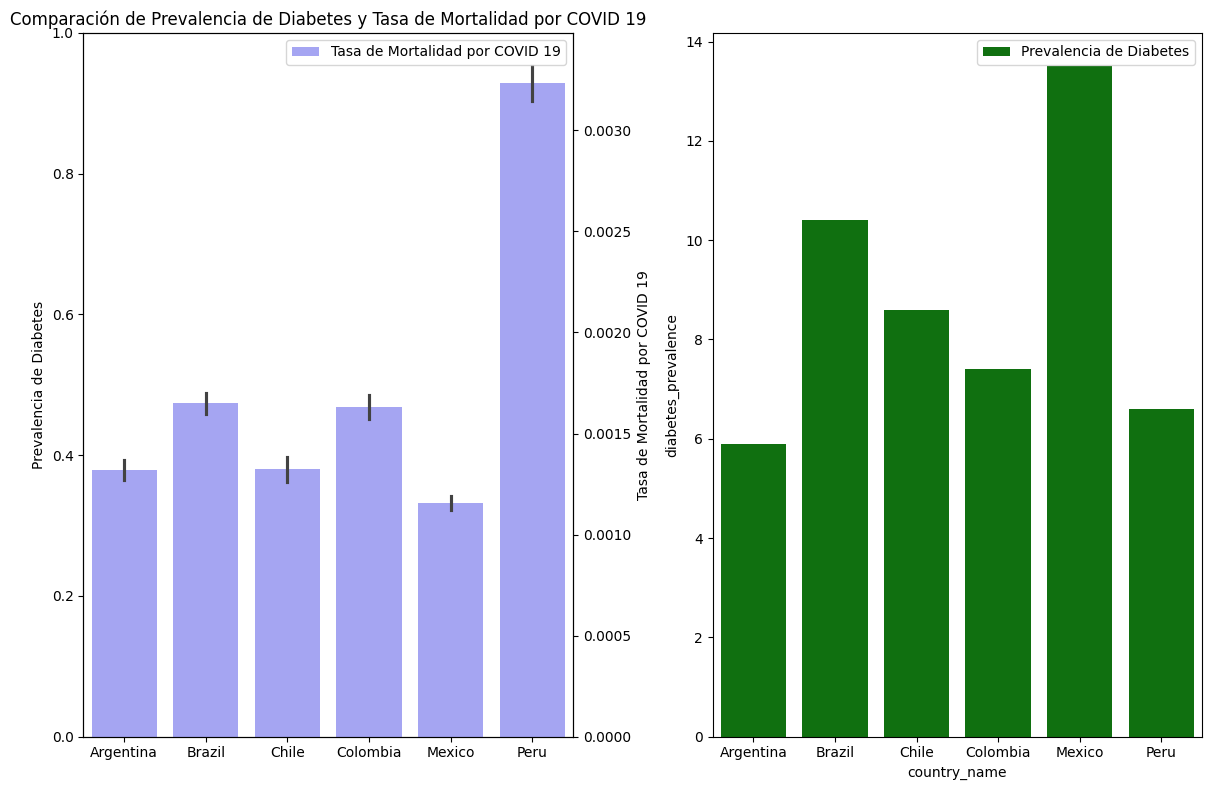

In [22]:
# Graficar comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(data=df_latam_imputada, x=df_latam_imputada['country_name'], y=df_latam_imputada['diabetes_prevalence'], color='green', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=df_latam_imputada, x=df_latam_imputada['country_name'], y=df_latam_imputada['cumulative_deceased'] / df_latam_imputada['population'], color='blue', label='Tasa de Mortalidad por COVID 19', ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID 19')
plt.title('Comparación de Prevalencia de Diabetes y Tasa de Mortalidad por COVID 19')
plt.tight_layout()
plt.show()

## Tercer Avance

In [1]:
import numpy as np   #Importar librería Numpy
import pandas as pd  #Importar la librería pandas
import matplotlib.pyplot as plt # Importar la librería Matplotlib
import seaborn as sns # Importar la librería Seaborn

In [2]:
# Cargar el dataset listo para trabajar el análisis
df_latam_imputada = pd.read_csv('Datasets/data_latam_imputada.csv')

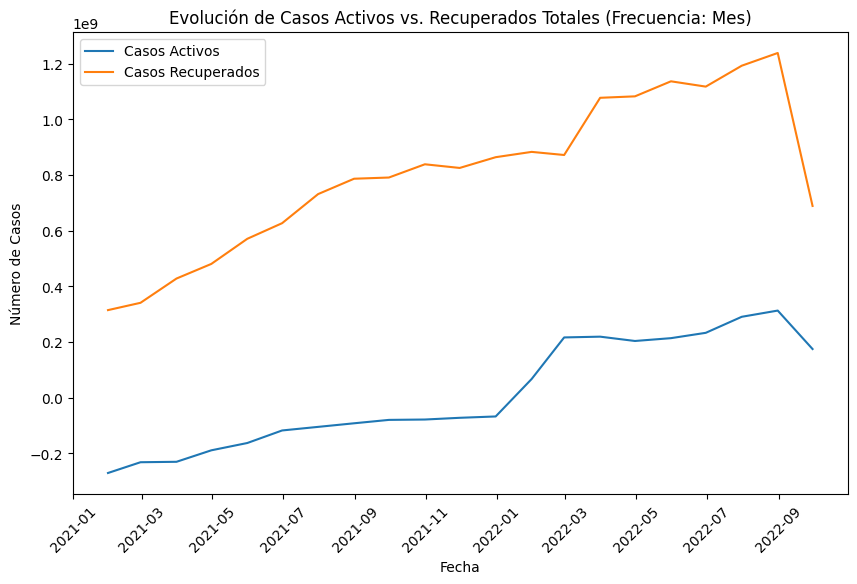

In [4]:
# Evolución de Casos Activos vs. Recuperados

# Obtener la fecha como índice del dataframe
df_latam_imputada['date'] = pd.to_datetime(df_latam_imputada['date'])
df_latam_imputada.set_index('date', inplace=True)

# Calcular los casos activos y recuperados totales
casos_activos_totales = df_latam_imputada['cumulative_confirmed'] - df_latam_imputada['cumulative_deceased'] - df_latam_imputada['cumulative_recovered']
casos_recuperados_totales = df_latam_imputada['cumulative_recovered']

# Cambiar la frecuencia de la fecha a mes utilizando resample
casos_activos_totales_resampled = casos_activos_totales.resample('ME').sum()
casos_recuperados_totales_resampled = casos_recuperados_totales.resample('ME').sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(casos_activos_totales_resampled.index, casos_activos_totales_resampled, label='Casos Activos')
plt.plot(casos_recuperados_totales_resampled.index, casos_recuperados_totales_resampled, label='Casos Recuperados')

# Configurar el título y las etiquetas de los ejes
plt.title('Evolución de Casos Activos vs. Recuperados Totales (Frecuencia: Mes)')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')

# Mostrar la leyenda
plt.legend()

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

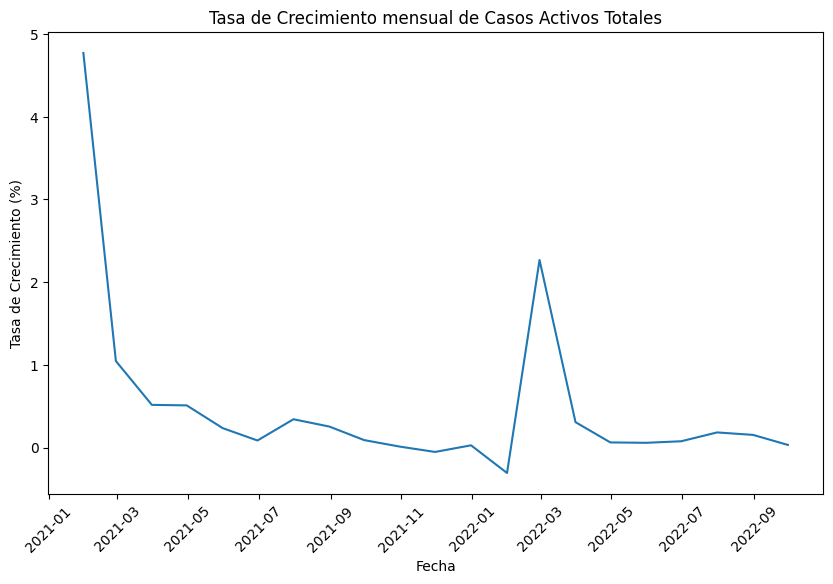

In [9]:

# Calcular los casos activos y recuperados totales
casos_activos_totales = df_latam_imputada['cumulative_confirmed'] - df_latam_imputada['cumulative_deceased'] - df_latam_imputada['cumulative_recovered']
casos_recuperados_totales = df_latam_imputada['cumulative_recovered']

# Cambiar la frecuencia de la fecha a mes utilizando resample
casos_activos_totales_resampled = casos_activos_totales.resample('ME').sum()
casos_recuperados_totales_resampled = casos_recuperados_totales.resample('ME').sum()

# Calcular la tasa de crecimiento
tasa_crecimiento = casos_activos_totales.pct_change() * 100

# Resample de la fecha a mes
tasa_crecimiento_resampled = tasa_crecimiento.resample('ME').mean()

# Graficar la serie de tiempo de la tasa de crecimiento resampleada
plt.figure(figsize=(10, 6))
plt.plot(tasa_crecimiento_resampled.index, tasa_crecimiento_resampled.values)
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.title('Tasa de Crecimiento mensual de Casos Activos Totales')
plt.xticks(rotation=45)
plt.show()

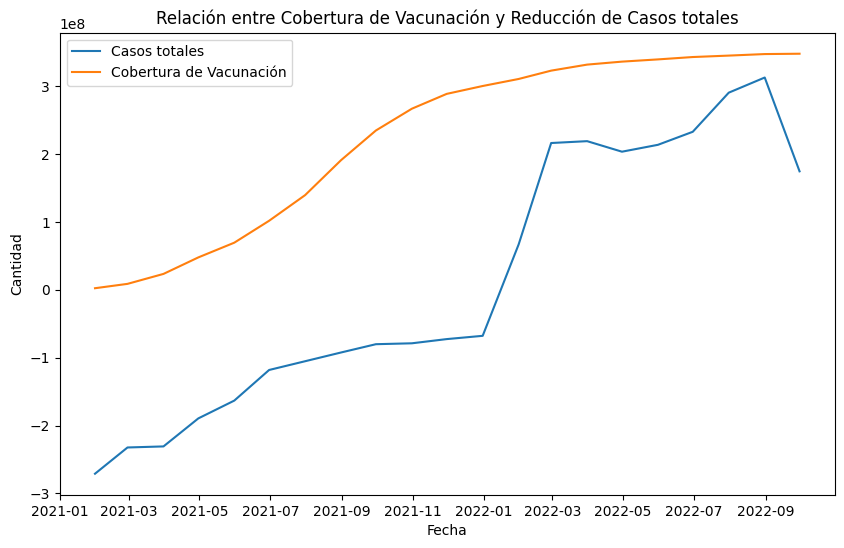

In [10]:
# Calcular los casos activos y recuperados totales
casos_activos_totales = df_latam_imputada['cumulative_confirmed'] - df_latam_imputada['cumulative_deceased'] - df_latam_imputada['cumulative_recovered']
casos_recuperados_totales = df_latam_imputada['cumulative_recovered']

# Cambiar la frecuencia de la fecha a mes utilizando resample
casos_activos_totales_resampled = casos_activos_totales.resample('ME').sum()
casos_recuperados_totales_resampled = casos_recuperados_totales.resample('ME').sum()
cumulative_vaccine_doses_administered_resampled = df_latam_imputada['cumulative_vaccine_doses_administered'].resample('ME').max()

# Graficar la relación entre la Cobertura de Vacunación y la Reducción de Casos totales
plt.figure(figsize=(10, 6))
plt.plot(casos_activos_totales_resampled.index, casos_activos_totales_resampled.values, label='Casos totales')
plt.plot(cumulative_vaccine_doses_administered_resampled.index, cumulative_vaccine_doses_administered_resampled.values, label='Cobertura de Vacunación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Relación entre Cobertura de Vacunación y Reducción de Casos totales')
plt.legend()
plt.show()

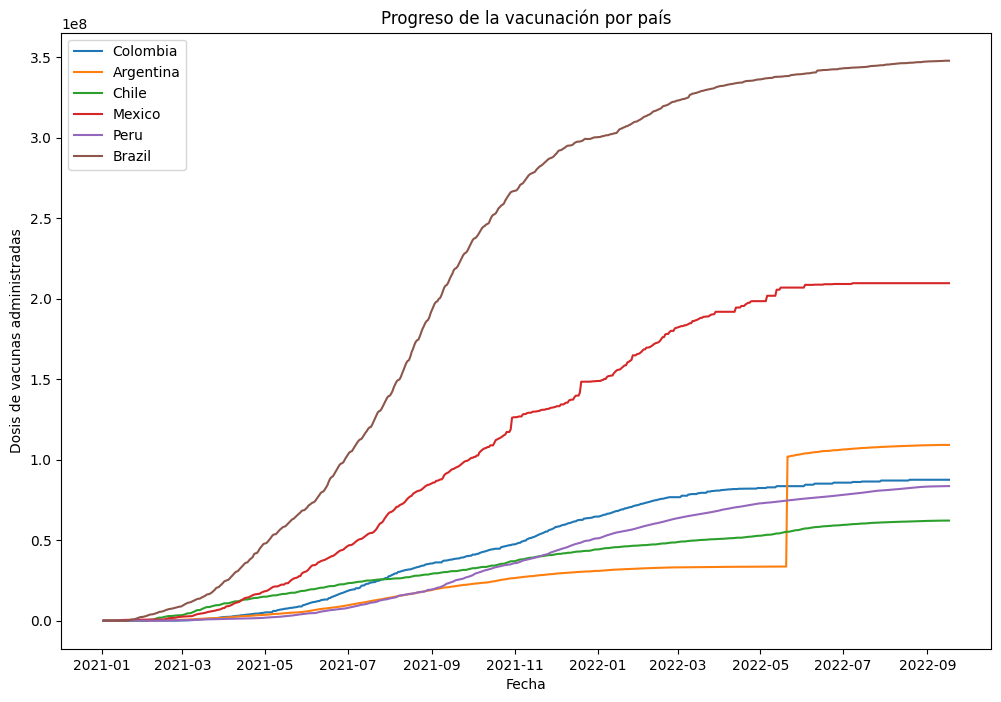

In [14]:
# Progreso de la vacunación por país

# Obtener los datos de vacunación por país
paises = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
vacunacion_por_pais = df_latam_imputada[df_latam_imputada['country_name'].isin(paises)]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
for pais in paises:
    datos_pais = vacunacion_por_pais[vacunacion_por_pais['country_name'] == pais]
    plt.plot(datos_pais.index, datos_pais['cumulative_vaccine_doses_administered'], label=pais)

# Personalizar el gráfico
plt.title('Progreso de la vacunación por país')
plt.xlabel('Fecha')
plt.ylabel('Dosis de vacunas administradas')
plt.legend()

# Mostrar el gráfico
plt.show()

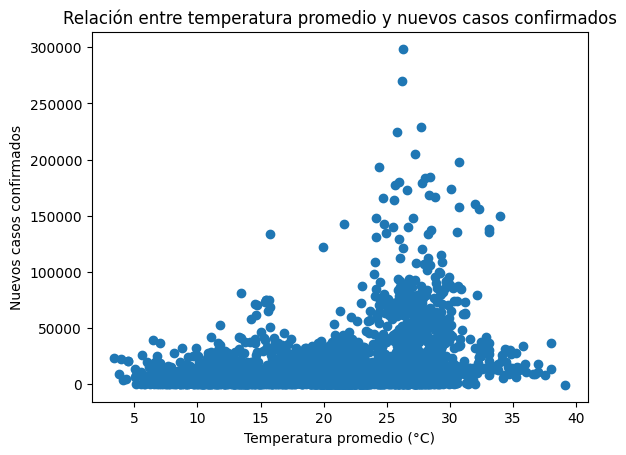

In [15]:
import matplotlib.pyplot as plt

# Obtener los valores de las variables
new_confirmed = df_latam_imputada['new_confirmed']
average_temperature = df_latam_imputada['average_temperature_celsius']

# Crear el gráfico de dispersión
plt.scatter(average_temperature, new_confirmed)

# Agregar etiquetas y título al gráfico
plt.xlabel('Temperatura promedio (°C)')
plt.ylabel('Nuevos casos confirmados')
plt.title('Relación entre temperatura promedio y nuevos casos confirmados'	)

# Mostrar el gráfico
plt.show()

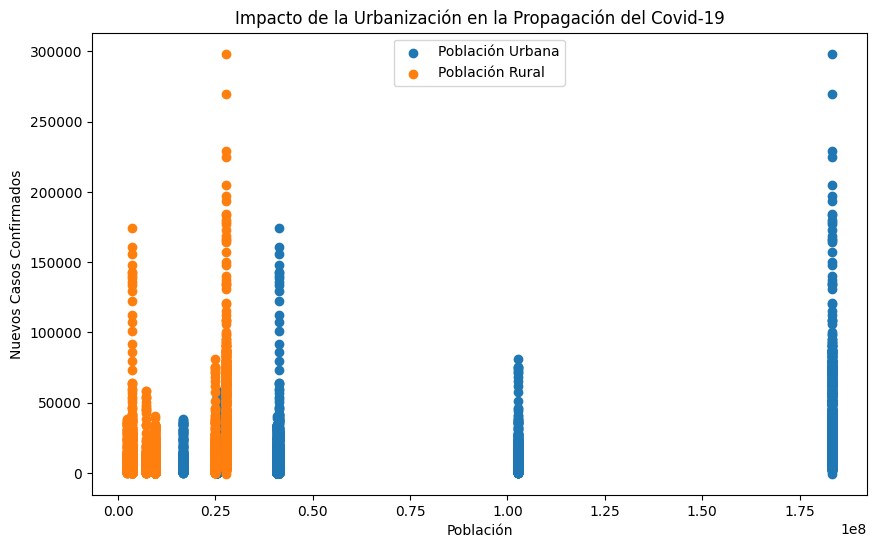

In [16]:


# Obtener los datos de interés
new_confirmed = df_latam_imputada['new_confirmed']
population_urban = df_latam_imputada['population_urban']
population_rural = df_latam_imputada['population_rural']

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.scatter(population_urban, new_confirmed, label='Población Urbana')
plt.scatter(population_rural, new_confirmed, label='Población Rural')
plt.xlabel('Población')
plt.ylabel('Nuevos Casos Confirmados')
plt.title('Impacto de la Urbanización en la Propagación del Covid-19')
plt.legend()
plt.show()

In [ ]:
'''
'location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_male_mortality_rate', 'adult_female_mortality_rate',
       'pollution_mortality_rate', 'comorbidity_mortality_rate',
       'new_recovered', 'cumulative_recovered'
       '''